# Data Aggregation

Module 1/6 for Data Cleaning and Analysis

## 1. Introduction

So far, we've learned how to use the pandas library and how to create
visualizations with data sets that didn't require much cleanup. Now we need
to learn how to properly clean up the data in order to be able to manipulate
data quickly and efficiently.

We'll learn how to:
- Data aggregation
- how to combine data
- how to transform data
- how to clean strings with pandas
- how to handle missing and duplicate data

Prerequiste knowledge:
-basic knowledge of pandas dataframes and series
- how to select values and filter a dataframe
- knowedge of data exploration methods in pandas
- how to create visualizations in pandas and matplotlib

The data we'll work with an annual report created by the UN Sustainable Developement
Solutions Network called the World Happiness Report. It's intent is to guide policy.
It assigns each country a Happiness score based on answers to poll questiolns.
It includes factors that may contribute to each country's Happiness. The factors
aren't necessarily used in the calculation but can help us undesrstand why
a certain score was given.

we want to answer the following Questions:
1) How can aggregating data give us more insight into happiness scores?
2) How did world happiness change from 2015 to 2017?
3 Which factors contribue the most to the happiness score?

In this module we'll learn how to aggregate data.



## 2. Introduction to the Data

The data we'll be working with is called 'World_Happiness_2015.csv'

Here are the columns we'll be working with:
- Country - Name of the country.
- Region - Name of the region the country belongs to.
- Happiness Rank - The rank of the country, as determined by its happiness score.
- Happiness Score - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.
- Family - The estimated extent to which family contributes to the happiness score.
- Freedom - The estimated extent to which freedom contributes to the happiness score.
- Generosity - The estimated extent to which generosity contributes to the happiness score.


In [1]:
# We're going to start by reading in our data set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

happiness2015 = pd.read_csv('World_Happiness_2015.csv')

first_5 =happiness2015.head(5)
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


## 3. Using Loops to Aggregate Data

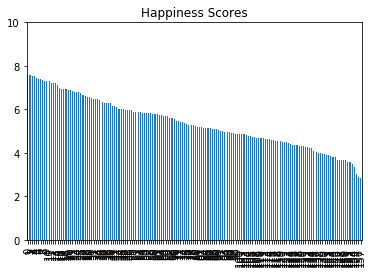

In [2]:
# We want to visualize the happiness score for our dataframe:
happiness2015['Happiness Score'].plot(kind='bar', title='Happiness Scores', ylim=(0,10))

In [3]:
# The plot isn't helpful at all. There are too many data points to discern any one
# point.
# Since each country is assigned to a specific region we'll use that to try to 
# clear up our visual.
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

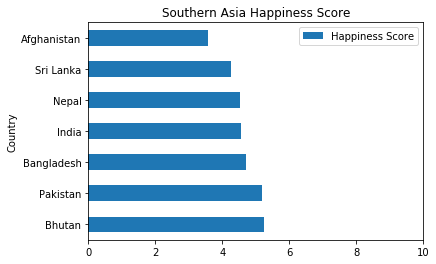

In [4]:
# We're going to try to plot one region
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh',
title='Southern Asia Happiness Score', xlim=(0,10))

In [5]:
# It's much easier to read but we won't know if southern asia is 
# representative of the rest of the world unless we look at the other
# regions.
# We're going ot use mean happiness scores by region

#2 steps:
# 1) identify each unique group in data set
# 2) for each group:
#   - Select only the rows corresponding to that group
#   - calculate the average for those rows

# Place to store results for mean happiness of regions
mean_happiness = {}

# create array of unique values for region
regions = happiness2015['Region']

for r in regions:
    region_group = happiness2015[happiness2015['Region'] == r]
    region_mean = region_group['Happiness Score'].mean()
    mean_happiness[r]= region_mean

## 4.  The GroupBy Operation

breaking down the code we wrote in the previous screen into 3 steps we get:
1. Split the dataframe into groups.
2. Apply a function to each group.
3. Combine the results into one data structure.


In [6]:
mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    #1. Split the dataframe into groups.
    region_group = happiness2015[happiness2015['Region'] == r]
    #2. Apply a function to each group.
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[r] = region_mean

Pandas has a built-in operation for this process. The 'grouby' operation performs these steps on a dataframe but does it in 2 steps:
1. create a GroupBy object.
2. call a function on the GroupBy object

The GroupBy object allows us to split the dataframe into groups, but only in an abstract sense. Nothing is actually computed until a function is called on the GroupBy object.

The groupby operation can be thought of as a structure made o stacking blocks in different colors and sizes.

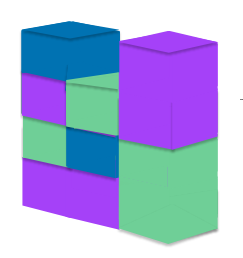

You know you'll eventually want to group the blocks according to color instead, but you don't know yet what you want to do with them after. Using the groupby process, we would first create a mapping document, the GroupBy object, containing information on how to group the blocks by color and where each block is located in the original structure.

Once we create the mapping document, we can use it to easily rearrange the blocks into different structures.

Creating the initial mapping document, or GroupBy object, allows us to optimize our work, because we no longer have to refer back to the original dataframe. By working with the groupby operation, we make our code faster, more flexible, and easier to read.

## 5. Creating GroupBy Objects

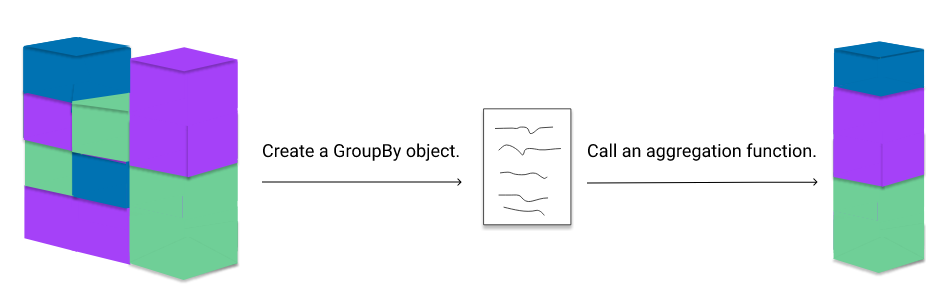

In [7]:
# The 1st step is to create a GroupBy object
# df.groupby('col')

# Let's make sure that there are not too many regions so that the region is
# good group to work with.
happiness2015['Region'].value_counts()


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [8]:
#Now we can create a GroupBy object using Region
happiness2015.groupby('Region')
print(happiness2015.groupby('Region'))

In [9]:
# We want to build some intution around the GroupBy object
# We'll start with GroupBy.get_group() method
# we'll use for North America
grouped = happiness2015.groupby('Region')
grouped.get_group('North America')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [10]:
# We're gonna practice a bit more
aus_nz = grouped.get_group('Australia and New Zealand')

## 6. Exploring GroupBy Objects


In [11]:
# We use GroupBy.groups attribute to get more info:
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

Notice that the values include the index for each row in the original happiness2015 dataframe with the corresponding region name.

In [12]:
# we're gonna filter out indexes 8 and 9 to prove this
happiness2015.iloc[8:10]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


We see that they correspond to the same countries.

In [13]:
# we're going to continue building our intuition by practicing using the
# groups attribute and get_group() method

# We want to Prove that for the 'North America' group in the dictionary returned
# by grouped.groups correspond to countries in North America in the happiness2015

# The indexes we care about are 4 and 14
north_america = happiness2015.iloc[[4,14]]

In [14]:
na_group = grouped.get_group('North America')

In [15]:
equal = north_america == na_group
print(equal)

    Country  Region  Happiness Rank  Happiness Score  Standard Error  \
4      True    True            True             True            True   
14     True    True            True             True            True   

    Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
4                       True    True                      True     True   
14                      True    True                      True     True   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
4                            True        True               True  
14                           True        True               True  


## 7. Common Aggregation Methods with Groupby

Now we want use GroupBy objects to aggregate our data. In order to do so, we must call a function on the GroupBy object.

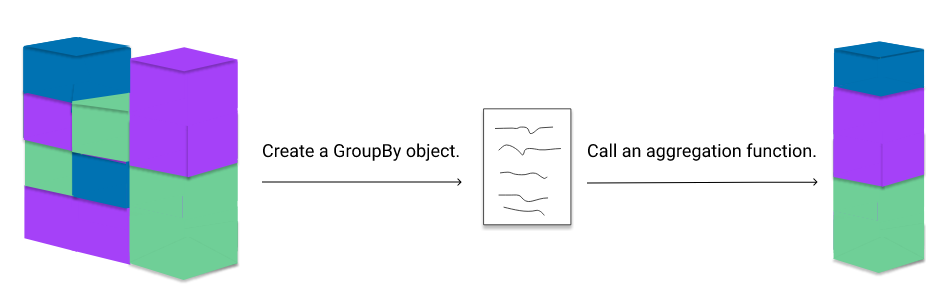

In [16]:
# A basic example is computing the number of rows for each of the groups.
# We can use the GroupBy.size() method to confirm the size of each 
# region group:
grouped = happiness2015.groupby('Region')
grouped.size()



Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

Pandas has built in a number of other common aggregation methods:
- mean()	Calculates the mean of groups.
- sum()	Calculates the sum of group values.
- size()	Calculates the size of the groups.
- count()	Calculates the count of values in groups.
- min()	Calculates the minimum of group values.
- max()	Calculates the maximum of group values.

In [17]:
# More Practice
means = grouped.mean()

## 8. Aggregating Specific Columns with GroupBy

GroupBy objects actually support column indexing, just like dataframes. You can select specific columns for a GroupBy object the same way you would for a dataframe.



In [18]:
# We are going to practice a bit more.
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()

## 9. Introduction to Agg() method

What if We wanted to apply more than one kind of aggregation to a column at a time? 

The GroupBy.agg() method can perform both aggregations at once.

'GroupBy.agg([ func_name1, func_name2, func_name3 ])'

In [20]:
# We're gonna pass np.mean and np.max methods into GroupBy.agg() 
# method and apply it happy_grouped.
happy_grouped.agg([np.mean, np.max])


,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


In [23]:
# Here is a custom function that calculates the difference between
# mean and max values
def dif(group):
    return (group.max() - group.mean())

# We're going to pass it through GroupBy.agg()
mean_max_dif = happy_grouped.agg(dif)

## 10. Computing Multiple and Custom Aggregations with the Agg() Method

Up until this point, we've deliberately split creating the GroupBy object and calling a function into separate steps to make it easier to understand. However, there may be instances in which the statements are combined:

In [24]:
happiness2015.groupby('Region')['Happiness Score'].agg(dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

Both approaches will return the same result. However, if you plan on computing multiple aggregations with the same GroupBy object, it's recommended to save the object to a variable first. You may wish to save it to a variable in all cases to make your code easier to understand. As we compute more complex aggregations, the syntax can get confusing!

In [25]:
# We are going to inspect the following code
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()

In [26]:
print(happiness_means)

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


## 11. Aggregation with Pivot Tables

When we printed happiness_means, we saw that the values in the Region column are the index of the resulting series and the Happiness Score column contained the values that would be aggregated.

Index and values are actually arguments used in another method used to aggregate data - the DataFrame.pivot_table() method. It can perform the same kinds of aggregations as the df.groupby method and make the code for complex aggregations easier to read.

In [28]:
# We use the df.pivot_table() method to perform the same aggregations as above.
happiness2015.pivot_table(values='Happiness Score', index='Region', 
                          aggfunc=np.mean)

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


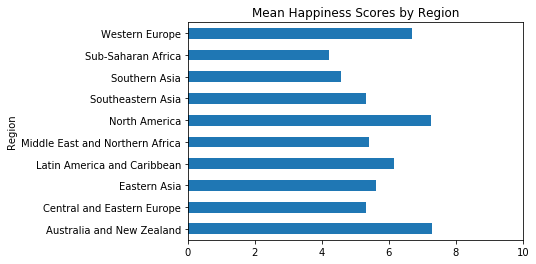

In [29]:
# This method returns a dataframe so normal df filtering and methods 
# can be applied to it.

#Example we use DataFrame.plot()
pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region')
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region',
                 xlim=(0, 10), legend=False)

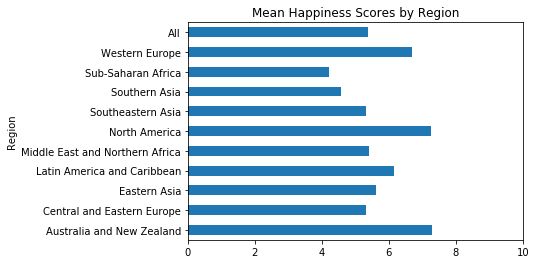

In [36]:
#Now we explore a unique feature of df.pivot_table()
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region',
                                         aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region',
                 xlim=(0, 10), legend=False)

world_mean_happiness = happiness2015['Happiness Score'].mean()

## 12. Aggregating Multiple Columns and Functions with Pivot Tables

The pivot_table method also allows us to aggregate multiple columns and apply multiple functions at once.

Below, we aggregate both the 'Happiness Score' and 'Family' columns in happiness2015 and group by the 'Region' column:

In [38]:
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


In [39]:
# We can also pass a list of functions
happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min, np.max], margins=True)

,mean,amin,amax
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253


In [42]:
# We are going to compare the groupby and pivot_table results

hap_region =happiness2015.groupby('Region')
grouped = hap_region['Happiness Score', 'Family']
happy_family_stats = grouped.agg([np.min, np.max, np.mean])



In [45]:
pv_happy_family_stats = happiness2015.pivot_table(['Happiness Score', 
                                                  'Family'],
                                                  'Region',
                                                  aggfunc=[np.min, np.max, np.mean], 
                                                  margins=True)